# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

N = 700

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [3]:
ages = df.loc[:,'Age']
ages.describe()

count    10010.000000
mean        35.293906
std          9.314089
min         13.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 151., 1629., 2943., 2221., 1825.,  832.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

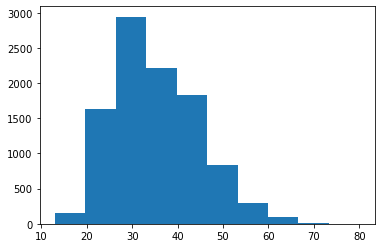

In [4]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

[37.36810062 49.6336841  40.34200094 45.79029849 42.01662099 41.98513933
 17.06381845 12.36537563 40.39841545 43.5976744  43.35742372 55.61896909
 19.56927011 37.38390717 35.28828261 33.53312075 24.8679784  18.37266067
 31.79233069 24.12398501 33.68767649 54.30780814 35.35983545 29.2662366
 23.07677622 21.70137095 36.65621253 30.4107995  43.98303491 53.14475688
 51.42600198 21.51263676 33.17665394 50.47861071 12.61508989 38.38459673
 32.96682531 35.76986224 32.01904236 29.31444483 13.67478113 44.62655349
 29.00462229 25.66809548 42.44803865 37.37754434 32.15900538 28.09058021
 35.70970045 26.60267913 30.29916706 54.63745038 35.67018257 42.49641082
 21.83684646 42.85643221 47.69683865 25.62203857 23.86392203 50.58490791
 20.38933491 29.45466126 30.69887138 29.26787162 48.93886331 36.79492638
 45.07241943 31.79560468 45.00268113 34.8560355  21.54635322 30.29702839
 30.5884328  42.11972279 40.59651614 24.66600951 27.24849448 35.41825137
 58.55443578 46.36582497 33.8041663  38.19987933 38.

(array([  6.,  30.,  79., 147., 201., 133.,  78.,  18.,   6.,   2.]),
 array([ 5.30976385, 11.93555216, 18.56134048, 25.18712879, 31.8129171 ,
        38.43870541, 45.06449373, 51.69028204, 58.31607035, 64.94185867,
        71.56764698]),
 <BarContainer object of 10 artists>)

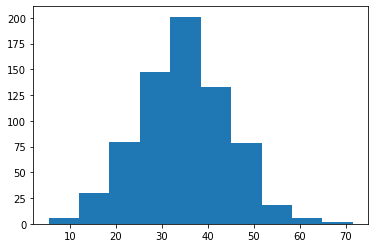

In [5]:
rng = np.random.default_rng()
vals = rng.normal(loc=ages.mean(), scale=ages.std(), size=N)
print(vals)
plt.hist(vals, bins=10)

This appears to be a pretty close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [6]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.describe()

,Year,Age
count,213.000000,213.000000
mean,2000.680751,35.394366
std,10.407792,6.350187
min,1978.000000,20.000000
25%,1993.000000,31.000000
50%,2001.000000,35.000000
75%,2010.000000,40.000000
max,2019.000000,55.000000


In [7]:
minNoOxAge = noOxygen.Age.mean() - noOxygen.Age.std()*3
maxNoOxAge = noOxygen.Age.mean() + noOxygen.Age.std()*3

print('Minimum age for no oxygen attempt is {} and maximum age is {}.'.format(round(minNoOxAge,2), round(maxNoOxAge,2)))

Minimum age for no oxygen attempt is 16.34 and maximum age is 54.44.


A recent [experiment](https://abcnews.go.com/Health/story?id=2955209&page=1) at Everest Base Camp and the [successful ascent](https://www.nytimes.com/2010/05/20/sports/20climber.html) of a 13 year old show the controversy around the ethics of minors at high altitude.

In [8]:
noOxPotential = df[(df['Age'] >= 18) & (df['Age'] <= 55)].Age.count() 
noOxPotential

9699

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters in the appropriate age range determined above.

In [9]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.02196102690999072

In [10]:
synNoOx = rng.binomial(1, noOxProbability)
synNoOx

0

Calculate use of oxygen synthetic data

In [11]:
oxUse = []
for a in vals:
    if a >= 18 and a <= 55:
        oxUse.append(synNoOx)
    else:
        oxUse.append(1)
print(oxUse)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Calculate the probabilities of climbing in each season.

In [12]:
sprCount = df.loc[df.loc[:,'Season'] == 'Spr'].Season.count()
sumCount = df.loc[df.loc[:,'Season'] == 'Sum'].Season.count()
autCount = df.loc[df.loc[:,'Season'] == 'Aut'].Season.count()
winCount = df.loc[df.loc[:,'Season'] == 'Win'].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

seasProbs = [sprProb, sumProb, autProb, winProb]
seasProbs

[0.9692307692307692,
 0.0008991008991008991,
 0.028371628371628373,
 0.0014985014985014985]

Generate a set of seasons chosen by each climber in the synthetic dataset.

In [13]:
seas = ['Spr', 'Sum', 'Aut', 'Win']
seasList = []

for i in range(0, N):
    seasChoice = random.choices(seas, weights=seasProbs)
    seasList.append(seasChoice[0])

print(seasList)

['Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Win', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr'

Calculate the probabilities of surviving for summitting in each season with and without oxygen.

In [14]:
for i in seas:
    NoOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'No')].Season.count(),2)
    print('The historical probability of death after summitting when climbing without oxygen in {} is {}'.format(i,NoOxDeathProb))
    OxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'Y')].Season.count(),2)
    print('The historical probability of death after summitting when climbing with oxygen in {} is {}'.format(i,OxDeathProb))


The historical probability of death after summitting when climbing without oxygen in Spr is 0.06
The historical probability of death after summitting when climbing with oxygen in Spr is 0.01
The historical probability of death after summitting when climbing without oxygen in Sum is 0.0
The historical probability of death after summitting when climbing with oxygen in Sum is 0.0
The historical probability of death after summitting when climbing without oxygen in Aut is 0.13
The historical probability of death after summitting when climbing with oxygen in Aut is 0.02
The historical probability of death after summitting when climbing without oxygen in Win is 0.0
The historical probability of death after summitting when climbing with oxygen in Win is 0.07


Compile list with climber number, ages, season and oxygen use.

In [22]:
synEverestData = []

def everestFunction():
    for i in range(0, N):
        data = []
        if oxUse[i] == 0 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y')].Season.count())

        if oxUse[i] == 1:
            oxUse2 = 'No'
        else:
            oxUse2 = 'Yes'

        if death == 0:
            death2 = 'Survived'
        else:
            death2 = 'Died'


        data = [i, round(vals[i],0), oxUse2, seasList[i], death2]
        synEverestData.append(data)
        
    return synEverestData
        

everestFunction()
print(synEverestData)


[[0, 37.0, 'Yes', 'Spr', 'Survived'], [1, 50.0, 'Yes', 'Spr', 'Survived'], [2, 40.0, 'Yes', 'Spr', 'Survived'], [3, 46.0, 'Yes', 'Spr', 'Survived'], [4, 42.0, 'Yes', 'Spr', 'Survived'], [5, 42.0, 'Yes', 'Spr', 'Survived'], [6, 17.0, 'No', 'Spr', 'Survived'], [7, 12.0, 'No', 'Spr', 'Survived'], [8, 40.0, 'Yes', 'Spr', 'Survived'], [9, 44.0, 'Yes', 'Spr', 'Survived'], [10, 43.0, 'Yes', 'Spr', 'Survived'], [11, 56.0, 'No', 'Spr', 'Survived'], [12, 20.0, 'Yes', 'Spr', 'Died'], [13, 37.0, 'Yes', 'Spr', 'Survived'], [14, 35.0, 'Yes', 'Spr', 'Survived'], [15, 34.0, 'Yes', 'Spr', 'Survived'], [16, 25.0, 'Yes', 'Spr', 'Survived'], [17, 18.0, 'Yes', 'Spr', 'Survived'], [18, 32.0, 'Yes', 'Spr', 'Survived'], [19, 24.0, 'Yes', 'Spr', 'Survived'], [20, 34.0, 'Yes', 'Spr', 'Survived'], [21, 54.0, 'Yes', 'Spr', 'Survived'], [22, 35.0, 'Yes', 'Aut', 'Survived'], [23, 29.0, 'Yes', 'Spr', 'Survived'], [24, 23.0, 'Yes', 'Spr', 'Survived'], [25, 22.0, 'Yes', 'Spr', 'Survived'], [26, 37.0, 'Yes', 'Spr', 'Su

In [16]:
synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])

synEverestDataDf.head()

,Climber,Age,Oxygen,Season,Survived
0,0,37.0,Yes,Spr,Survived
1,1,50.0,Yes,Spr,Survived
2,2,40.0,Yes,Spr,Survived
3,3,46.0,Yes,Spr,Survived
4,4,42.0,Yes,Spr,Survived


In [18]:
numberOfDeaths = synEverestDataDf[synEverestDataDf['Survived'] == 'Died'].Survived.count()
numberOfDeaths

42